<h3> Lambda+map/filter 

<h4> Exercise1: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which elements are lengths for each sequence -> [6, 5, 10, 5].

In [3]:
sequences = ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"]

y = list(map(lambda a: len(a),sequences))
print(y)

[6, 5, 10, 5]


<h4> Exercise2: Let's define a list of sequences ["ATGGGG", "AAATT", "GGGATAGAGA", "GAGAT"] and in the next step create  a new list which contains only these sequences which starts with "G" -> ["GGGATAGAGA", "GAGAT"].

In [4]:
y = list(filter(lambda a: a[0]=='G',sequences))
print(y)

['GGGATAGAGA', 'GAGAT']


<h3> FASTA files processing

<h4> Exercise3: Open a file 'sequences' and save sequences into the dictionary variable Seq.

 <br>
 
Remark: You may start with creating two lists containing headings and sequences and in the next step convert them into a dictionary.

In [18]:
heading = []
contains = []
with open('sequences', 'r') as f:
    for line in f:  #for every line in sequences file
        line = line.rstrip() #The rstrip() method removes characters at the end a string (including "\n")
        if line.startswith('>'):
            heading.append(line[1:])
        else: contains.append(line)
        
print(heading)
print(contains)

['s1', 's2', 's3']
['ATGCGCG', 'TATCGGCG', 'CCCCCCCCCC']


In [19]:
Seq = dict(zip(heading, contains))
print(Seq)

{'s1': 'ATGCGCG', 's2': 'TATCGGCG', 's3': 'CCCCCCCCCC'}


<h3> Searching the set of Sequences

<h4> Exercise4: Consider the following nucleotide sequence:

In [59]:
query = "ATGCAACATATGCGACAAATGCTATTCTTATTATATTCGGATTC"

<h4> File "database_n" contains 100 nucleotide sequences. 
<br>
    
Make an alignment between every subsequent sequence in the file and the query (assume the following system points: match:1, mismatch:-3, insert=1, extend=1). 
    
- Which sequences are the most similar to the query? You may plot the distributions of scores using plt.hist(data) method.

In [60]:
from alignment import SequenceAlign, dotMatrix

#seqA = 'TAGGCTATGCTATAGGCTTAAGCTAGGCTATATGCTATAGCGGCCAAAAT'
#seqB = 'GGCTATATGCTATAGCGGCCAAAATTAGGCTATGCTATAGGCTTAAGCTA'

heading = []
scores = []

with open('database_n', 'r') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith('>'):
            heading.append(line[1:])
        if not line.startswith('>'):
            score, alignA, alignB = SequenceAlign(query, line, insert=1, extend=1)
            scores.append(score)
  
scores_dict = dict(zip(heading, scores))
print(scores_dict)


{'seq0': -6.0, 'seq1': -6.0, 'seq2': 1.0, 'seq3': 1.0, 'seq4': -2.0, 'seq5': -2.0, 'seq6': -1.0, 'seq7': 2.0, 'seq8': 5.0, 'seq9': -2.0, 'seq10': 1.0, 'seq11': 39.0, 'seq12': -8.0, 'seq13': -8.0, 'seq14': -3.0, 'seq15': 5.0, 'seq16': -6.0, 'seq17': -1.0, 'seq18': -5.0, 'seq19': -3.0, 'seq20': -10.0, 'seq21': -1.0, 'seq22': -4.0, 'seq23': -12.0, 'seq24': -10.0, 'seq25': -2.0, 'seq26': -7.0, 'seq27': -5.0, 'seq28': -7.0, 'seq29': -2.0, 'seq30': -12.0, 'seq31': -6.0, 'seq32': -10.0, 'seq33': -9.0, 'seq34': -4.0, 'seq35': -3.0, 'seq36': -5.0, 'seq37': -7.0, 'seq38': -3.0, 'seq39': -6.0, 'seq40': -12.0, 'seq41': -4.0, 'seq42': -7.0, 'seq43': -4.0, 'seq44': 37.0, 'seq45': -2.0, 'seq46': -9.0, 'seq47': -4.0, 'seq48': -10.0, 'seq49': 5.0, 'seq50': -8.0, 'seq51': -9.0, 'seq52': 2.0, 'seq53': -7.0, 'seq54': -4.0, 'seq55': -7.0, 'seq56': 0.0, 'seq57': -4.0, 'seq58': -10.0, 'seq59': -9.0, 'seq60': -5.0, 'seq61': 0.0, 'seq62': -1.0, 'seq63': -3.0, 'seq64': -6.0, 'seq65': -10.0, 'seq66': -1.0, 'seq6

In [43]:
#Which sequences are the most similar to the query?

max_value_key = max(scores_dict, key=scores_dict.get)
max_value = max(scores_dict.values())
print(max_value_key,":", max_value)

seq11 : 39.0


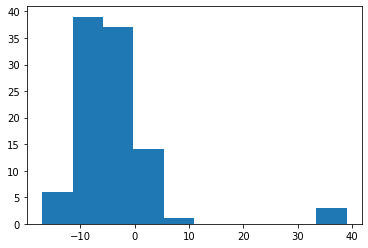

In [47]:
import matplotlib.pyplot as plt

plt.hist(scores)
plt.show()

<h4> Exercise5: Consider the following protein sequence:

In [64]:
query = "EKPDPHTKMHQYWLKPYELMEIYYQYRPFINFDQQMRVGLRCEA"

<h4> File "database_p" contains 100 protein sequences. 
<br>
    

    
Using k-mers with k=3, compare every sequence in the file and the query (you may use k_comparison method from the lecture2). 
    
- Which sequences are the most similar to the query? You may plot the distributions of distances using plt.hist(data) method. 

- What are the advantages and disadvatages of such an approach comparing to the alignment approach?  
    
- In the nucleotide case, the $k$ parameter should be bigger or smaller? Why?

In [6]:
#k-mers

def kmers(seq, k = 3):
    d = {}
    N = len(seq)
    for i in range(N-k+1):
        mer = seq[i:(i+k)]
        if mer not in d.keys():
            d[mer] = 1
        else:
            d[mer] += 1
    return d


kmers("ATGGTGG")

{'ATG': 1, 'TGG': 2, 'GGT': 1, 'GTG': 1}

In [49]:
def k_comparison(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    d2 = kmers(seq2, k)
    all_mers = []
    keysd1 = list(d1.keys())
    keysd2 = list(d2.keys())
    unique_mers = list(set(keysd1+keysd2))
    c1 = []
    c2 = []
    for elem in unique_mers:
        if elem in d1.keys():
            c1.append(d1[elem])
        else:
            c1.append(0)
            
    for elem in unique_mers:
        if elem in d2.keys():
            c2.append(d2[elem])
        else:
            c2.append(0)
    distance = 0
    for i in range(len(c1)):
        distance += (c1[i]-c2[i])**2
    return round(distance**0.5,2)

In [65]:
heading = []
scores = []

with open('database_p', 'r') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith('>'):
            heading.append(line[1:])
        if not line.startswith('>'):
            score = k_comparison(query, line)
            scores.append(score)
            
scores_dict = dict(zip(heading, scores))
print(scores_dict)

{'seq0': 8.94, 'seq1': 9.17, 'seq2': 8.94, 'seq3': 9.06, 'seq4': 9.17, 'seq5': 9.06, 'seq6': 9.17, 'seq7': 9.06, 'seq8': 9.17, 'seq9': 8.94, 'seq10': 8.94, 'seq11': 8.94, 'seq12': 9.17, 'seq13': 8.94, 'seq14': 9.27, 'seq15': 9.33, 'seq16': 9.27, 'seq17': 9.06, 'seq18': 3.32, 'seq19': 8.94, 'seq20': 8.94, 'seq21': 9.06, 'seq22': 9.17, 'seq23': 8.94, 'seq24': 9.06, 'seq25': 9.17, 'seq26': 8.94, 'seq27': 3.87, 'seq28': 9.17, 'seq29': 9.06, 'seq30': 9.17, 'seq31': 8.94, 'seq32': 9.33, 'seq33': 9.06, 'seq34': 9.43, 'seq35': 8.94, 'seq36': 9.17, 'seq37': 9.17, 'seq38': 8.83, 'seq39': 9.17, 'seq40': 8.94, 'seq41': 9.06, 'seq42': 8.94, 'seq43': 8.94, 'seq44': 8.94, 'seq45': 9.33, 'seq46': 8.94, 'seq47': 9.17, 'seq48': 9.06, 'seq49': 9.33, 'seq50': 9.17, 'seq51': 9.06, 'seq52': 9.17, 'seq53': 9.06, 'seq54': 9.17, 'seq55': 9.33, 'seq56': 9.17, 'seq57': 8.94, 'seq58': 9.27, 'seq59': 9.06, 'seq60': 9.06, 'seq61': 9.17, 'seq62': 9.17, 'seq63': 9.17, 'seq64': 9.17, 'seq65': 9.17, 'seq66': 9.17, 'seq

In [66]:
#Which sequences are the most similar to the query?

max_value_key = max(scores_dict, key=scores_dict.get)
max_value = max(scores_dict.values())
print(max_value_key,":", max_value)

seq34 : 9.43


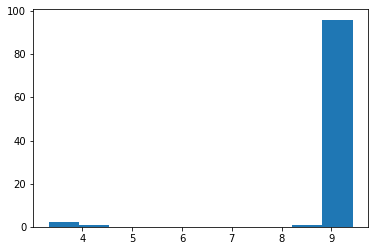

In [67]:
import matplotlib.pyplot as plt

plt.hist(scores)
plt.show()

#### What are the advantages and disadvatages of such an approach comparing to the alignment approach?

$\to$ this approach takes into account possible modifications in the sequences and increases the probability of finding the sequence from which the query is derived. However, this approach is more advanced and therefore time-consuming and, with incorrect assumptions, may lead to incorrect conclusions


#### In the nucleotide case, the $k$ parameter should be bigger or smaller? Why? 

$\to$ in the case of nucleotides, the length of the k-mer should be longer, because there are only 4 nucleotides, so there is less variety in subsequent places - the more randomly placed nucleotides in a given sequence, the greater the probability that each subsequent one will be different. In summary: longer k-mers ensure the specificity of the fit.

<h4> Exercise6: Consider the following protein subsequence:

In [4]:
query = "WRQAAALQK"  

<h4> File "database_p2" contains 100 longer protein sequences. 

<h4> Using k-mers with k=3 compare every sequence in the file and the query - check which k-mers that are present in the query are present in the sequences from the file. As a result, for the comparison between two sequences you obtain the total number of k-mers shared between sequences (so if k-mer is present add 1).
    
<br>
    
    
- Which sequences are the query sequence possibly derived from? Localize the query fragments.
- Look at these sequences and make a comment on it.

In [1]:
def k_comparison_count(seq1, seq2, k=3):
    d1 = kmers(seq1, k)
    all_mers = []
    keysd1 = list(d1.keys())
    unique_mers = list(set(keysd1))
    c1 = 0
    c2 = []
    for elem in unique_mers:
        if elem in seq2:
            c1 += 1
    
    return c1

In [7]:
heading = []
scores = []

with open('database_p2', 'r') as f:
    for line in f:
        line = line.rstrip()
        if line.startswith('>'):
            heading.append(line[1:])
        if not line.startswith('>'):
            score = k_comparison_count(query, line)
            scores.append(score)
  
scores_dict = dict(zip(heading, scores))
print(scores_dict)

{'seq0': 0, 'seq1': 1, 'seq2': 0, 'seq3': 0, 'seq4': 0, 'seq5': 7, 'seq6': 0, 'seq7': 1, 'seq8': 1, 'seq9': 0, 'seq10': 0, 'seq11': 1, 'seq12': 0, 'seq13': 1, 'seq14': 1, 'seq15': 0, 'seq16': 0, 'seq17': 0, 'seq18': 0, 'seq19': 0, 'seq20': 0, 'seq21': 0, 'seq22': 2, 'seq23': 0, 'seq24': 0, 'seq25': 0, 'seq26': 0, 'seq27': 0, 'seq28': 0, 'seq29': 6, 'seq30': 1, 'seq31': 0, 'seq32': 0, 'seq33': 0, 'seq34': 0, 'seq35': 1, 'seq36': 1, 'seq37': 0, 'seq38': 0, 'seq39': 1, 'seq40': 0, 'seq41': 0, 'seq42': 0, 'seq43': 0, 'seq44': 0, 'seq45': 0, 'seq46': 0, 'seq47': 0, 'seq48': 0, 'seq49': 0, 'seq50': 0, 'seq51': 0, 'seq52': 0, 'seq53': 1, 'seq54': 0, 'seq55': 0, 'seq56': 0, 'seq57': 0, 'seq58': 5, 'seq59': 0, 'seq60': 0, 'seq61': 0, 'seq62': 1, 'seq63': 0, 'seq64': 0, 'seq65': 1, 'seq66': 2, 'seq67': 0, 'seq68': 0, 'seq69': 0, 'seq70': 0, 'seq71': 2, 'seq72': 1, 'seq73': 0, 'seq74': 1, 'seq75': 1, 'seq76': 0, 'seq77': 0, 'seq78': 1, 'seq79': 0, 'seq80': 1, 'seq81': 1, 'seq82': 0, 'seq83': 0, '

In [8]:
#Which sequences are the most similar to the query?

max_value_key = max(scores_dict, key=scores_dict.get)
max_value = max(scores_dict.values())
print(max_value_key,":", max_value)

seq5 : 7


$\to$ query is propably derived from seq5 - it gives the highest score

In [82]:
with open('database_p2', 'r') as f:
    n=0
    for line in f:
        line = line.rstrip()
        if line.startswith('>'):
            n += 1
        if n==6:
            print(line)

>seq5
TFCMMQKWVMLAPECGGHVCCSHPPTMEACGSHRVWPQDLDQGLQRKEPRLWTAQWPKMRMNFLAFWEKMWRRFCRIARGWLAAFIDDQQAEIHHHCATGMYNSQPNWWISKFMYFRGRSIDHCFQDLPMRFSMRLCGNYKGRQQNRPYFFWQFYMLWHETDSHVGRQMDDKCQFMRLRMWRQAAALQKTVVYCMCYQGDIGEKCELKGNCMPWNWRRLPMYIEQYFRSNSTYCLYVWMPSIKDHEFPGIDLRGCGNCVLADPHVGIANQGDGCCNMRCFACHSPIHIECQYAFVRTWWEQASSCYLVTPLTTLGKSMKPRVSHFGCYYGQALCQDWIFGANWKSINTAQRDSCKDMDICEYYMDCPQHWGSWWMLCIALVKIDDMMYCSETFDLKCAMQ


$\to$ after having a look on seq5 it was noticed, that the whole query is there, so it gives us a confirmation, that the query more possibly is derived from this sequence

<h3> MSA and Phylogeny

<h4> Exercise7: According to the Profile, what is the probability of observing the following sequences:
        
- TARPSPVEIAL 
- TARPSPVEIAA 

In [16]:
def Profile(alignment):
    
    n = len(alignment[0])
    nS = len(alignment)
    profile = []
    
    for i in range(n):
        
        how_many = {}
        
        for seq in alignment:
            residue = seq[i]
            
            if residue == '-':
                continue
                
            how_many[residue] = how_many.get(residue, 0) + 1 
            
        for residue in how_many:
            how_many[residue] /= nS
            
        profile.append(how_many)
        
    return profile

In [72]:
alignment = ['S-RPAPVVIIL',
             'TAVPAPVVIIL',
             'HAHFSEPEITL',
             'HAEFSELVIAL']

print(Profile(alignment))

[{'S': 0.25, 'T': 0.25, 'H': 0.5}, {'A': 0.75}, {'R': 0.25, 'V': 0.25, 'H': 0.25, 'E': 0.25}, {'P': 0.5, 'F': 0.5}, {'A': 0.5, 'S': 0.5}, {'P': 0.5, 'E': 0.5}, {'V': 0.5, 'P': 0.25, 'L': 0.25}, {'V': 0.75, 'E': 0.25}, {'I': 1.0}, {'I': 0.5, 'T': 0.25, 'A': 0.25}, {'L': 1.0}]


In [81]:
seq = "TARPSPVEIAL"

propability = 1

for i in range(len(seq)):
    propability *= Profile(alignment)[i][seq[i]]
    
print(propability)

0.00018310546875


In [82]:
seq = "TARPSPVEIAA"

propability = 1

for i in range(len(seq)):
    if(seq[i]) in Profile(alignment)[i]:
        propability *= Profile(alignment)[i][seq[i]]
    else: propability *= 0
    
print(propability)

0.0


<h4> Exercise8: Open the file "sparc_sequences" and perform the multiple sequence alignment (using profiles) and then, save it into the file adding at the end Align Comparison line. 

In [12]:
from practical1 import BLOSUM62, DNA_2, SequenceAlign #let's import DNA_2/BLOSU62 variables and SequenceAlign function

In [18]:
def ProfileAlign(profileA, profileB, simiarityMatrix = DNA_2, insert=3, extend=1):
    
    import numpy as np
    
    numI = len(profileA) + 1
    numJ = len(profileB) + 1
    
    SMatrix = np.zeros((numI, numJ))
    RMatrix = np.zeros((numI, numJ))
    
    for i in range(1, numI):
        RMatrix[i,0] = 1
        
    for j in range(1, numJ):
        RMatrix[0,j] = 2

    for i in range(1, numI):
        for j in range(1, numJ):
            
            penalty1 = insert
            penalty2 = insert
            
            if RMatrix[i-1, j] == 1:
                penalty1 = extend
                
            elif RMatrix[i, j-1] == 2:
                penalty2 = extend
                
            frac_A = profileA[i-1]
            frac_B = profileB[j-1]
            
            similarity = 0
            totalWeight = 0
            
            for residue_A in frac_A:
                for residue_B in frac_B:
                    
                    weight = frac_A[residue_A] * frac_B[residue_B]
                    totalWeight += weight
                    similarity += weight * simiarityMatrix[residue_A][residue_B]
                    
            penalty1 *= totalWeight
            penalty2 *= totalWeight
            
            paths = [SMatrix[i-1, j-1] + similarity,
                     SMatrix[i-1, j] - penalty1,
                     SMatrix[i, j-1] - penalty2]
            
            best = max(paths) #maximum value of paths list
            route = paths.index(best) #index where maximum value
            
            SMatrix[i, j] = best
            RMatrix[i, j] = route
            
        pA = []
        pB = []
        
        i = numI-1
        j = numJ-1
        
        score = SMatrix[i, j]
        
        while i > 0 or j > 0:
            route = RMatrix[i, j]
            if route == 0: 
                pA.append(profileA[i-1])
                pB.append(profileB[j-1])
                i -= 1
                j -= 1
            elif route == 1: 
                pA.append(profileA[i-1])
                pB.append(None)
                i -= 1
            elif route == 2: 
                pA.append(None)
                pB.append(profileB[j-1])
                j -= 1
                
    pA.reverse()
    pB.reverse()
    
    return score, pA, pB

In [13]:
def ProfileMultipleAlignment(seqs, similarityMatrix = DNA_2):
    """
    This function returns Multiple Sequence Alignment (MSA)
    for a given list of sequences using profiles.
    """
    n = len(seqs)
    
    score, alignA, alignB = SequenceAlign(seqs[0], seqs[1], similarityMatrix) #alignment for two first sequences
    
    MSA = [alignA, alignB]
    
    for i in range(2,n):
        
        profA = Profile(MSA)
        toAdd = [seqs[i],] #the next sequence (3d, 4th and so on)
        profB = Profile(toAdd)
        score, alignA, alignB = ProfileAlign(profA, profB, similarityMatrix) #alignment between two profiles
        
        gaps = []
        
        for j, frac in enumerate(alignA):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(MSA):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
                MSA[j] = seq
                
        gaps = []
        
        for j, frac in enumerate(alignB):
            if frac is None:
                gaps.append(j)
                
        for j, seq in enumerate(toAdd):
            for gap in gaps:
                seq = seq[:gap] + '-' + seq[gap:]
            toAdd[j] = seq
    
        MSA.extend(toAdd)
        
    return MSA

In [28]:
def AlignComparison(align, similarityMatrix, thresholds):
    
    similarity = ''
    conservation = Conservation(align, similarityMatrix)
    t_1, t_2, t_3 = thresholds
    
    for S in conservation:
        if S >= t_1:
            char = '*'
        elif S >= t_2:
            char = ':'
        elif S >= t_3:
            char = '.'
        else:
            char = ' '
        similarity += char
        
    return similarity

In [32]:
def Conservation(align, similarityMatrix = DNA_2):
    
    """
    This functions returns a list of numbers which indicate
    on the conservation of subsequent position. 1 means that
    the same residue is in all aligned sequences.
    """
    
    conservation = []
    prof = Profile(align)
    
    for elem in prof:
        
        items = list(elem.items())
        items.sort(key = lambda x: x[1])
        score = 0
        for resA, compA in items:
            for resB, compB in items:
                score += compA*compB*similarityMatrix[resA][resB]
                
        bestLetter = items[-1][0]
        maxScore = similarityMatrix[bestLetter][bestLetter]
        score /= maxScore
        
        conservation.append(score)
        
    return conservation

In [30]:
sequences = []

with open('sparc_sequences.txt', 'r') as f:
    for line in f:
        line = line.rstrip()
        if not line.startswith('>'):
            sequences.append(line)
  
align = ProfileMultipleAlignment(sequences, BLOSUM62)

In [33]:
symbols = AlignComparison(align, BLOSUM62, (1.0, 0.5, 0.3))

In [34]:
my_file = open("file.txt", "w")
for k, seq in enumerate(align):
    my_file.write(seq)
    my_file.write("\n")

my_file.write(symbols)
my_file.close()

<h4> Exercise9: Define a function $MerMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $k\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [69]:
def 𝑀𝑒𝑟𝑀𝑎𝑡𝑟𝑖𝑥(seqs):
    import numpy as np

    n = len(seqs)
    A = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            A[i, j] = k_comparison(seqs[i], seqs[j])
            
    return A

In [72]:
organisms = ["human","mouse","rat","chicken"]

insuline = ["MALWMRLLPLLALLALWGPDPAAAFVNQHLCGSHLVEALYLVCGERGFFYTPKTRREAEDLQVGQVELGGGPGAGSLQPLALEGSLQKRGIVEQCCTSICSLYQLENYCN",
         "MALWMRFLPLLALLFLWESHPTQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVAQQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRFLPLLALLILWEPRPAQAFVKQHLCGSHLVEALYLVCGERGFFYTPMSRREVEDPQVAQLELGGGPGAGDLQTLALEVARQKRGIVDQCCTSICSLYQLENYCN",
         "MALWIRSLPLLALLVFSGPGTSYAAANQHLCGSHLVEALYLVCGERGFFYSPKARRDVEQPLVSSPLRGEAGVLPFQQEEYEKVKRGIVEQCCHNTCSLYQLENYCN"]

In [70]:
print(MerMatrix(insuline))

[[ 0.    9.8   9.9  11.09]
 [ 9.8   0.    5.48 11.53]
 [ 9.9   5.48  0.   11.27]
 [11.09 11.53 11.27  0.  ]]


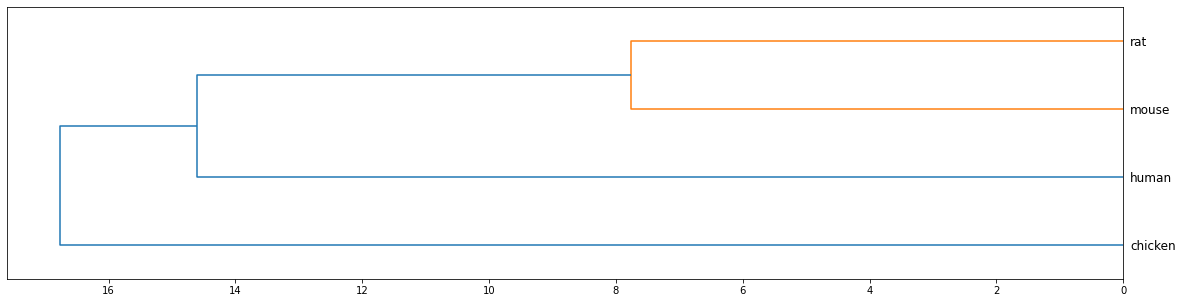

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(MerMatrix(insuline)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()

<h4> Exercise10: Define a function $LZMatrix$ that takes a list of sequences and returns a matrix of distances between them (see Lecture 2, $words\_comparison$ function). Use this matrix to generate a phylogenetic tree for insuline sequences.

In [79]:
def WordSeq(seq):
    d=[]
    l=len(seq)
    i=0
    k=1
    n=0
    while i<l:
        while seq[i:i+k] in d and i+k<l:#Everytime the word is already in the list, k+=1 -> the function check with the next letter
            k+=1
        if seq[i:i+k] not in d:     
            d.append(seq[i:i+k])  #When the word isn't in d, the loop stops and the word is put into the list
        i+=k  #i becomes i+k to start to read again after the words that was already added
        k=1#we set again the value of k to 1 so that when the loops start again it start to check if the next letter is in the list    
    return d


In [74]:
def words_comparison(seq1, seq2):
    l1 = len(WordSeq(seq1))
    l2 = len(WordSeq(seq2))
    l3 = len(WordSeq(seq1+seq2))
    C = (l3 - min(l1,l2))/max(l1,l2)
    return C

In [77]:
def LZ𝑀𝑎𝑡𝑟𝑖𝑥(seqs):
    import numpy as np
    
    n = len(seqs)
    A = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            A[i, j] = words_comparison(seqs[i], seqs[j])
            
    return A

In [80]:
print(LZMatrix(insuline))

[[0.67213115 0.74193548 0.75409836 0.73770492]
 [0.74193548 0.70967742 0.75806452 0.75806452]
 [0.75409836 0.77419355 0.78688525 0.78688525]
 [0.75409836 0.77419355 0.78688525 0.68333333]]


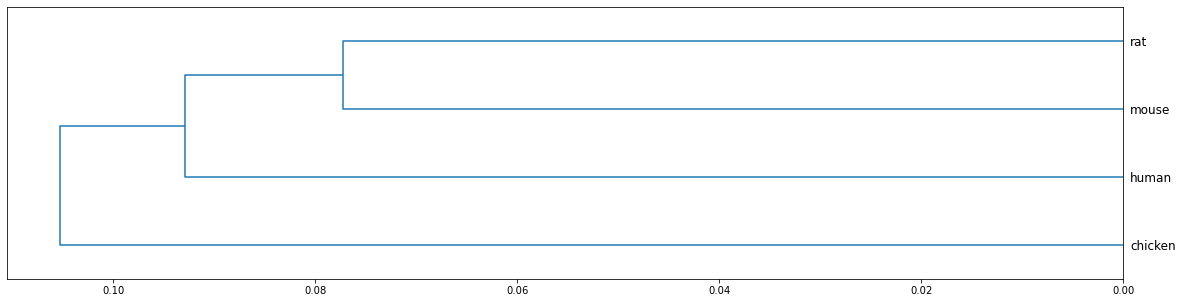

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage #to generate a tree
from scipy.spatial.distance import pdist  #to prepare an approprite format

X = pdist(LZMatrix(insuline)) 
dist = linkage(X, method="average")  #average = UPGMA method


fig = plt.figure(figsize=(20, 5))
dn = dendrogram(dist, labels = organisms, orientation = "left")
plt.show()